In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from datetime import date, timedelta
import os
import random

keras = tf.keras

# Import Data and Preprocessing

In [ ]:
#import data
from google.colab import files 
uploaded = files.upload()

Saving Foreign_Exchange_Rates.csv to Foreign_Exchange_Rates.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['Foreign_Exchange_Rates.csv'])) 
print(df)

      Unnamed: 0  Time Serie  ... TAIWAN - NEW TAIWAN DOLLAR/US$ THAILAND - BAHT/US$
0              0  2000-01-03  ...                          31.38               36.97
1              1  2000-01-04  ...                           30.6               37.13
2              2  2000-01-05  ...                           30.8                37.1
3              3  2000-01-06  ...                          31.75               37.62
4              4  2000-01-07  ...                          30.85                37.3
...          ...         ...  ...                            ...                 ...
5212        5212  2019-12-25  ...                             ND                  ND
5213        5213  2019-12-26  ...                          30.11               30.15
5214        5214  2019-12-27  ...                          30.09               30.14
5215        5215  2019-12-30  ...                          30.04               29.94
5216        5216  2019-12-31  ...                          29.91 

In [ ]:
df = df.drop(columns=["Unnamed: 0"])
newColumnsNames = list(map(lambda c: c.split(" - ")[0] if "-" in c else "date", df.columns))
df.columns = newColumnsNames
#set date as index
df = df.set_index("date")
df.index = pd.to_datetime(df.index)
#set a daily frequency
df = df.resample('D').asfreq()
# Fill ND values with previous and next values
df = df.replace("ND", np.nan)
df.isnull().values.any()
df = df.ffill().bfill()
#convert to float type
col_list=list(df)
df[col_list[0:]] = df[col_list[0:]].apply(pd.to_numeric, errors='coerce')

In [ ]:
subset_columns = list(['AUSTRALIA', 'EURO AREA', 'NEW ZEALAND', 'UNITED KINGDOM', 'CHINA'])
df_subset = df[subset_columns][-1500:]
df_subset

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,CHINA
date,,,,,
2015-11-23,1.3912,0.9432,1.5359,0.6612,6.3890
2015-11-24,1.3810,0.9388,1.5291,0.6641,6.3883
2015-11-25,1.3801,0.9420,1.5214,0.6619,6.3877
2015-11-26,1.3801,0.9420,1.5214,0.6619,6.3877
2015-11-27,1.3904,0.9438,1.5300,0.6649,6.3945
...,...,...,...,...,...
2019-12-27,1.4331,0.8949,1.4919,0.7639,6.9954
2019-12-28,1.4331,0.8949,1.4919,0.7639,6.9954
2019-12-29,1.4331,0.8949,1.4919,0.7639,6.9954


In [ ]:
df_subset.columns = ['AUSTRALIA', 'EURO_AREA', 'NEW_ZEALAND', 'UNITED_KINGDOM', 'CHINA']
split_train = 1000
split_test = 1300
data_train = df_subset[:split_train]
data_val = df_subset[split_train:split_test]
data_test = df_subset[split_test:]

In [ ]:
data_train

,AUSTRALIA,EURO_AREA,NEW_ZEALAND,UNITED_KINGDOM,CHINA
date,,,,,
2015-11-23,1.3912,0.9432,1.5359,0.6612,6.3890
2015-11-24,1.3810,0.9388,1.5291,0.6641,6.3883
2015-11-25,1.3801,0.9420,1.5214,0.6619,6.3877
2015-11-26,1.3801,0.9420,1.5214,0.6619,6.3877
2015-11-27,1.3904,0.9438,1.5300,0.6649,6.3945
...,...,...,...,...,...
2018-08-14,1.3812,0.8810,1.5181,0.7851,6.8809
2018-08-15,1.3826,0.8825,1.5249,0.7883,6.9330
2018-08-16,1.3744,0.8781,1.5158,0.7860,6.8792


In [ ]:
data_val

,AUSTRALIA,EURO_AREA,NEW_ZEALAND,UNITED_KINGDOM,CHINA
date,,,,,
2018-08-19,1.3732,0.8764,1.5133,0.7852,6.8740
2018-08-20,1.3684,0.8743,1.5108,0.7834,6.8546
2018-08-21,1.3602,0.8670,1.4981,0.7776,6.8444
2018-08-22,1.3602,0.8624,1.4928,0.7746,6.8400
2018-08-23,1.3767,0.8645,1.5033,0.7794,6.8748
...,...,...,...,...,...
2019-06-10,1.4360,0.8841,1.5117,0.7884,6.9298
2019-06-11,1.4376,0.8837,1.5195,0.7859,6.9107
2019-06-12,1.4405,0.8842,1.5198,0.7878,6.9161


In [ ]:
data_test

,AUSTRALIA,EURO_AREA,NEW_ZEALAND,UNITED_KINGDOM,CHINA
date,,,,,
2019-06-15,1.4552,0.8915,1.5380,0.7936,6.9247
2019-06-16,1.4552,0.8915,1.5380,0.7936,6.9247
2019-06-17,1.4577,0.8901,1.5375,0.7957,6.9251
2019-06-18,1.4552,0.8932,1.5319,0.7970,6.9002
2019-06-19,1.4556,0.8917,1.5326,0.7921,6.8996
...,...,...,...,...,...
2019-12-27,1.4331,0.8949,1.4919,0.7639,6.9954
2019-12-28,1.4331,0.8949,1.4919,0.7639,6.9954
2019-12-29,1.4331,0.8949,1.4919,0.7639,6.9954


In [ ]:
data_train.UNITED_KINGDOM

date
2015-11-23    0.6612
2015-11-24    0.6641
2015-11-25    0.6619
2015-11-26    0.6619
2015-11-27    0.6649
               ...  
2018-08-14    0.7851
2018-08-15    0.7883
2018-08-16    0.7860
2018-08-17    0.7852
2018-08-18    0.7852
Freq: D, Name: UNITED_KINGDOM, Length: 1000, dtype: float64

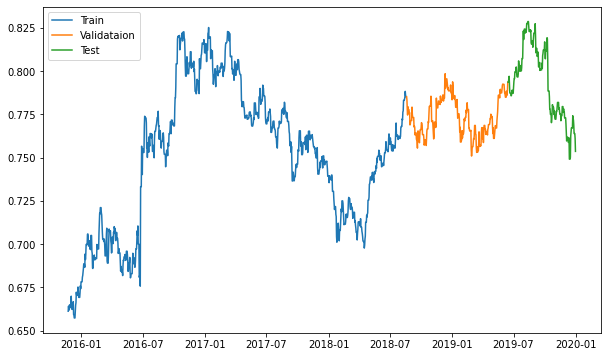

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_train.UNITED_KINGDOM, label='Train')
plt.plot(data_val.UNITED_KINGDOM, label='Validataion')
plt.plot(data_test.UNITED_KINGDOM, label='Test')
plt.legend(loc="upper left")
plt.show()

# Naive forecast

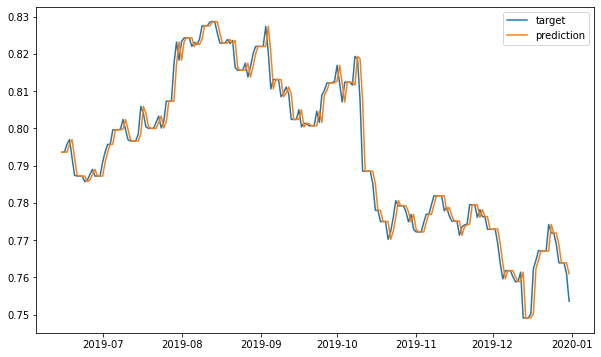

In [ ]:
naive_forecast = df_subset.UNITED_KINGDOM[split_test - 1:-1]

df_naive = pd.DataFrame(data_test.UNITED_KINGDOM)
df_naive['naive_forecast'] = df_subset.UNITED_KINGDOM[split_test - 1:-1].values

plt.figure(figsize=(10, 6))
plt.plot(df_naive.UNITED_KINGDOM, label = 'target')
plt.plot (df_naive.naive_forecast, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, df_naive.naive_forecast).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, df_naive.naive_forecast).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, df_naive.naive_forecast).numpy())))

MAE: 0.00213
MSE: 0.00001
RMSE: 0.00347


# Forecasting with Machine Learning: Linear Model


In [ ]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
tf.data.Dataset.from_tensor_slices(data_train.UNITED_KINGDOM)

<TensorSliceDataset shapes: (), types: tf.float64>

In [ ]:
window_size = 30
train_set = window_dataset(data_train.UNITED_KINGDOM, window_size)
valid_set = window_dataset(data_val.UNITED_KINGDOM, window_size)


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
for x, y in train_set:
  print(x,y)

<IPython.core.display.Javascript object>

tf.Tensor(
[[0.7459 0.7459 0.7459 0.747  0.7454 0.7475 0.75   0.7528 0.7528 0.7528
  0.7549 0.7592 0.7568 0.7547 0.7543 0.7543 0.7543 0.7534 0.7551 0.7611
  0.7637 0.7577 0.7577 0.7577 0.7614 0.7591 0.7591 0.756  0.754  0.754 ]
 [0.7639 0.7639 0.7616 0.7614 0.7637 0.7604 0.7536 0.7536 0.7536 0.7571
  0.7504 0.7499 0.7609 0.7652 0.7652 0.7652 0.7668 0.7686 0.7693 0.7716
  0.7732 0.7732 0.7732 0.7768 0.7681 0.7685 0.7606 0.7656 0.7656 0.7656]
 [0.8174 0.8215 0.8227 0.8227 0.8227 0.8189 0.8185 0.812  0.803  0.7971
  0.7971 0.7971 0.8063 0.8083 0.8017 0.7985 0.7985 0.7985 0.7985 0.802
  0.805  0.8032 0.8032 0.8112 0.8112 0.8112 0.8017 0.8049 0.8027 0.8027]
 [0.7015 0.7015 0.7015 0.6977 0.6993 0.7029 0.7046 0.7126 0.7126 0.7126
  0.7167 0.7156 0.7173 0.718  0.7254 0.7254 0.7254 0.7272 0.7347 0.7348
  0.737  0.7388 0.7388 0.7388 0.7371 0.7396 0.7371 0.7415 0.7381 0.7381]
 [0.7764 0.7762 0.7781 0.7759 0.7739 0.7646 0.7646 0.7646 0.7658 0.7677
  0.7671 0.7707 0.7711 0.7711 0.7711 0.7676 0.7665

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session() # you may re-run it, so clear everything to make sure we start back from zero
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30)) # increase lr gradually so that every 30 epoch by multiplying by 10
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9) #
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=500, callbacks=[lr_schedule])

<IPython.core.display.Javascript object>

Epoch 1/500
31/31 [==============================] - 1s 4ms/step - loss: 0.6347 - mae: 1.1347
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6315 - mae: 1.1315
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6228 - mae: 1.1228
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6171 - mae: 1.1171
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6102 - mae: 1.1102
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6023 - mae: 1.1023
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5937 - mae: 1.0937
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5864 - mae: 1.0864
Epoch 9/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5753 - mae: 1.0752
Epoch 10/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5683 - mae: 1.0683
Epoch 11/500
31/31 [==============================] - 0s 2m

(1e-06, 1.0, -0.1, 1.0)

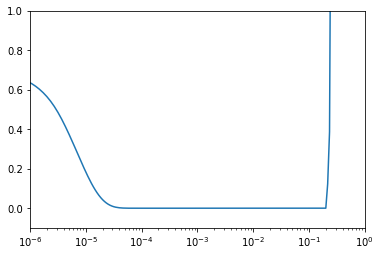

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1, -0.1, 1])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(data_train.UNITED_KINGDOM, window_size)
valid_set = window_dataset(data_val.UNITED_KINGDOM, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=5e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10) #check val loss keep go down
history = model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

<IPython.core.display.Javascript object>

Epoch 1/500
31/31 [==============================] - 1s 18ms/step - loss: 1.0213 - mae: 1.5213 - val_loss: 0.8949 - val_mae: 1.3949
Epoch 2/500
31/31 [==============================] - 0s 7ms/step - loss: 0.7903 - mae: 1.2903 - val_loss: 0.6127 - val_mae: 1.1127
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 0.5133 - mae: 1.0117 - val_loss: 0.3510 - val_mae: 0.8377
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2875 - mae: 0.7555 - val_loss: 0.1911 - val_mae: 0.6181
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 0.1570 - mae: 0.5580 - val_loss: 0.1037 - val_mae: 0.4551
Epoch 6/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0848 - mae: 0.4100 - val_loss: 0.0564 - val_mae: 0.3354
Epoch 7/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0457 - mae: 0.3009 - val_loss: 0.0307 - val_mae: 0.2473
Epoch 8/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0249 - 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


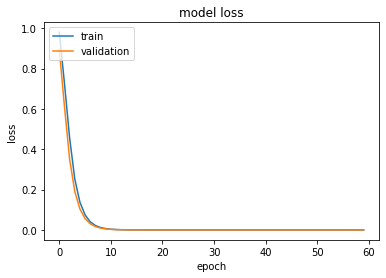

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
lin_forecast = model_forecast(model, df_subset.UNITED_KINGDOM[split_test - window_size:-1], window_size)[:, 0] #:-1 take all value after this number, except for the one at very last

In [ ]:
lin_forecast.shape

(200,)

In [ ]:
lin_forecast = pd.DataFrame(lin_forecast, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

In [ ]:
lin_forecast.UNITED_KINGDOM

date
2019-06-15    0.785635
2019-06-16    0.785951
2019-06-17    0.784173
2019-06-18    0.786307
2019-06-19    0.782861
                ...   
2019-12-27    0.749402
2019-12-28    0.758811
2019-12-29    0.755035
2019-12-30    0.761609
2019-12-31    0.763264
Freq: D, Name: UNITED_KINGDOM, Length: 200, dtype: float32

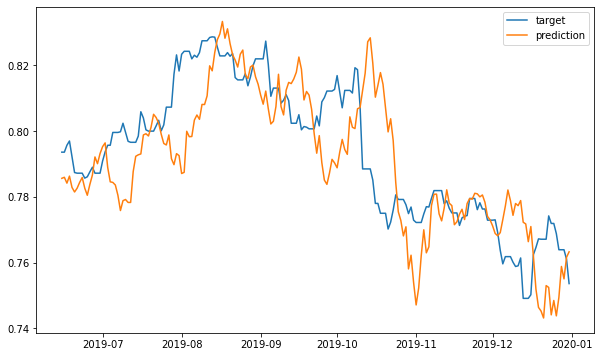

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test.UNITED_KINGDOM, label = 'target')
plt.plot (lin_forecast.UNITED_KINGDOM, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, lin_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, lin_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, lin_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.01220
MSE: 0.00025
RMSE: 0.01575


# Dense Model


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(data_train.UNITED_KINGDOM, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=300, callbacks=[lr_schedule])

<IPython.core.display.Javascript object>

Epoch 1/300
31/31 [==============================] - 1s 2ms/step - loss: 0.3126 - mae: 0.7896
Epoch 2/300
31/31 [==============================] - 0s 2ms/step - loss: 0.3138 - mae: 0.7911
Epoch 3/300
31/31 [==============================] - 0s 2ms/step - loss: 0.3117 - mae: 0.7885
Epoch 4/300
31/31 [==============================] - 0s 2ms/step - loss: 0.3110 - mae: 0.7876
Epoch 5/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3109 - mae: 0.7875
Epoch 6/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3095 - mae: 0.7857
Epoch 7/300
31/31 [==============================] - 0s 2ms/step - loss: 0.3078 - mae: 0.7835
Epoch 8/300
31/31 [==============================] - 0s 2ms/step - loss: 0.3066 - mae: 0.7820
Epoch 9/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3055 - mae: 0.7807
Epoch 10/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3053 - mae: 0.7803
Epoch 11/300
31/31 [==============================] - 0s 3m

(1e-06, 10.0, -0.1, 1.0)

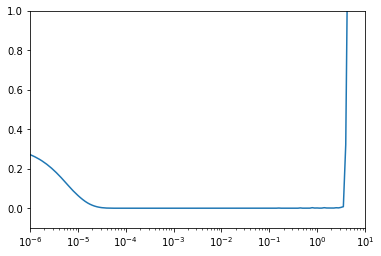

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 10, -0.1, 1])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(data_train.UNITED_KINGDOM, window_size)
valid_set = window_dataset(data_val.UNITED_KINGDOM, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

<IPython.core.display.Javascript object>

Epoch 1/500
31/31 [==============================] - 1s 11ms/step - loss: 0.2171 - mae: 0.6581 - val_loss: 0.2175 - val_mae: 0.6595
Epoch 2/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2028 - mae: 0.6359 - val_loss: 0.1995 - val_mae: 0.6316
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1850 - mae: 0.6073 - val_loss: 0.1829 - val_mae: 0.6047
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1698 - mae: 0.5818 - val_loss: 0.1679 - val_mae: 0.5794
Epoch 5/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1567 - mae: 0.5588 - val_loss: 0.1545 - val_mae: 0.5557
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1436 - mae: 0.5350 - val_loss: 0.1423 - val_mae: 0.5335
Epoch 7/500
31/31 [==============================] - 0s 6ms/step - loss: 0.1321 - mae: 0.5131 - val_loss: 0.1312 - val_mae: 0.5122
Epoch 8/500
31/31 [==============================] - 0s 7ms/step - loss: 0.1217 - 

In [ ]:
dense_forecast = model_forecast(
    model,
    df_subset.UNITED_KINGDOM[split_test - window_size:-1],
    window_size)[:, 0]

In [ ]:
dense_forecast.shape

(200,)

In [ ]:
dense_forecast = pd.DataFrame(dense_forecast, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

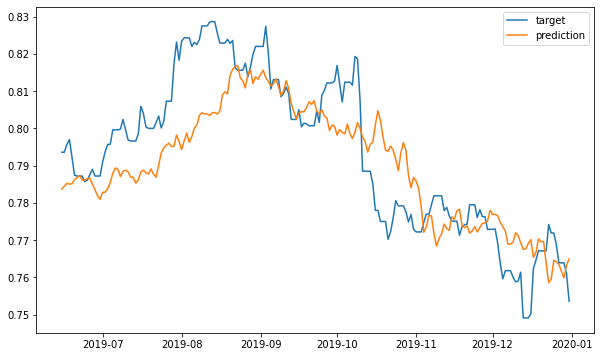

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test.UNITED_KINGDOM, label = 'target')
plt.plot (dense_forecast.UNITED_KINGDOM, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, dense_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, dense_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, dense_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.00981
MSE: 0.00015
RMSE: 0.01225


# Forecasting with 1D CNN

In [ ]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(data_train.UNITED_KINGDOM, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.Dense(units=32, activation='relu'),
  keras.layers.Dense(units=1)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=300, callbacks=[lr_schedule])

<IPython.core.display.Javascript object>

Epoch 1/300
8/8 [==============================] - 1s 9ms/step - loss: 0.2718 - mae: 0.7360
Epoch 2/300
8/8 [==============================] - 0s 10ms/step - loss: 0.2730 - mae: 0.7377
Epoch 3/300
8/8 [==============================] - 0s 8ms/step - loss: 0.2730 - mae: 0.7377
Epoch 4/300
8/8 [==============================] - 0s 8ms/step - loss: 0.2721 - mae: 0.7365
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 0.2724 - mae: 0.7369
Epoch 6/300
8/8 [==============================] - 0s 9ms/step - loss: 0.2725 - mae: 0.7370
Epoch 7/300
8/8 [==============================] - 0s 10ms/step - loss: 0.2721 - mae: 0.7365
Epoch 8/300
8/8 [==============================] - 0s 10ms/step - loss: 0.2719 - mae: 0.7362
Epoch 9/300
8/8 [==============================] - 0s 7ms/step - loss: 0.2721 - mae: 0.7365
Epoch 10/300
8/8 [==============================] - 0s 9ms/step - loss: 0.2724 - mae: 0.7369
Epoch 11/300
8/8 [==============================] - 0s 10ms/step - loss: 0.2

(1e-08, 10.0, -0.1, 1.0)

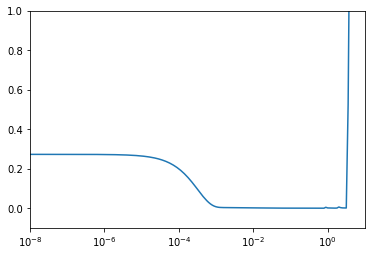

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 10, -0.1, 1])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(data_train.UNITED_KINGDOM, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(data_val.UNITED_KINGDOM, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.Dense(units=32, activation='relu'),
  keras.layers.Dense(units=1)
])
optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

<IPython.core.display.Javascript object>

Epoch 1/500
8/8 [==============================] - 1s 56ms/step - loss: 0.1960 - mae: 0.6246 - val_loss: 0.2030 - val_mae: 0.6365
Epoch 2/500
8/8 [==============================] - 0s 24ms/step - loss: 0.1906 - mae: 0.6159 - val_loss: 0.1935 - val_mae: 0.6215
Epoch 3/500
8/8 [==============================] - 0s 27ms/step - loss: 0.1812 - mae: 0.6006 - val_loss: 0.1831 - val_mae: 0.6045
Epoch 4/500
8/8 [==============================] - 0s 25ms/step - loss: 0.1705 - mae: 0.5824 - val_loss: 0.1724 - val_mae: 0.5864
Epoch 5/500
8/8 [==============================] - 0s 25ms/step - loss: 0.1604 - mae: 0.5649 - val_loss: 0.1619 - val_mae: 0.5683
Epoch 6/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1506 - mae: 0.5473 - val_loss: 0.1527 - val_mae: 0.5518
Epoch 7/500
8/8 [==============================] - 0s 26ms/step - loss: 0.1420 - mae: 0.5313 - val_loss: 0.1449 - val_mae: 0.5374
Epoch 8/500
8/8 [==============================] - 0s 25ms/step - loss: 0.1345 - mae: 0.51

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


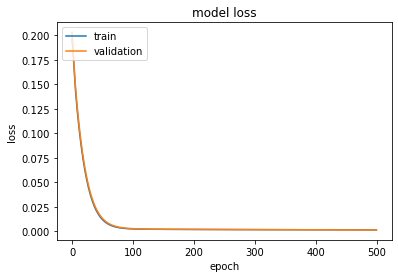

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
62*64

3968

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
cnn1d_forecast = model_forecast(model, df_subset.UNITED_KINGDOM[:,  np.newaxis], window_size)
cnn1d_forecast = cnn1d_forecast[split_test - window_size:-1, -1, 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
cnn1d_forecast.shape

(200,)

In [ ]:
cnn1d_forecast = pd.DataFrame(cnn1d_forecast, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

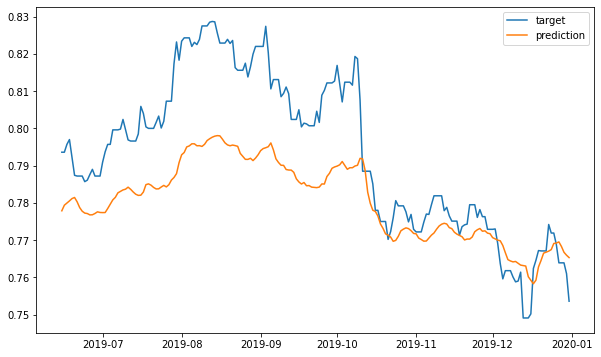

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test.UNITED_KINGDOM, label = 'target')
plt.plot (cnn1d_forecast.UNITED_KINGDOM, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, cnn1d_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn1d_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn1d_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.01413
MSE: 0.00029
RMSE: 0.01710


# Fully Convolutional Forecasting: WaveNet

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(data_train.UNITED_KINGDOM, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<IPython.core.display.Javascript object>

Epoch 1/100
8/8 [==============================] - 2s 56ms/step - loss: 0.2875 - mae: 0.7572
Epoch 2/100
8/8 [==============================] - 1s 55ms/step - loss: 0.2785 - mae: 0.7452
Epoch 3/100
8/8 [==============================] - 1s 54ms/step - loss: 0.2695 - mae: 0.7330
Epoch 4/100
8/8 [==============================] - 1s 55ms/step - loss: 0.2586 - mae: 0.7179
Epoch 5/100
8/8 [==============================] - 1s 56ms/step - loss: 0.2467 - mae: 0.7010
Epoch 6/100
8/8 [==============================] - 1s 55ms/step - loss: 0.2327 - mae: 0.6806
Epoch 7/100
8/8 [==============================] - 1s 56ms/step - loss: 0.2127 - mae: 0.6498
Epoch 8/100
8/8 [==============================] - 1s 58ms/step - loss: 0.1855 - mae: 0.6046
Epoch 9/100
8/8 [==============================] - 1s 56ms/step - loss: 0.1484 - mae: 0.5342
Epoch 10/100
8/8 [==============================] - 1s 57ms/step - loss: 0.1037 - mae: 0.4281
Epoch 11/100
8/8 [==============================] - 1s 56ms/step - lo

(0.0001, 0.1, -0.1, 1.0)

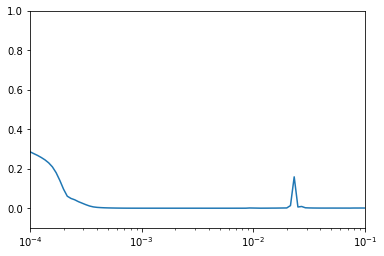

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, -0.1, 1])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(data_train.UNITED_KINGDOM, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(data_val.UNITED_KINGDOM, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

<IPython.core.display.Javascript object>

Epoch 1/500
8/8 [==============================] - 3s 143ms/step - loss: 0.2614 - mae: 0.7217 - val_loss: 0.2425 - val_mae: 0.6952
Epoch 2/500
8/8 [==============================] - 1s 77ms/step - loss: 0.2207 - mae: 0.6615 - val_loss: 0.1955 - val_mae: 0.6208
Epoch 3/500
8/8 [==============================] - 1s 78ms/step - loss: 0.1742 - mae: 0.5829 - val_loss: 0.1429 - val_mae: 0.5205
Epoch 4/500
8/8 [==============================] - 1s 81ms/step - loss: 0.1229 - mae: 0.4758 - val_loss: 0.0915 - val_mae: 0.3857
Epoch 5/500
8/8 [==============================] - 1s 82ms/step - loss: 0.0770 - mae: 0.3385 - val_loss: 0.0587 - val_mae: 0.2797
Epoch 6/500
8/8 [==============================] - 1s 78ms/step - loss: 0.0528 - mae: 0.2695 - val_loss: 0.0514 - val_mae: 0.2767
Epoch 7/500
8/8 [==============================] - 1s 82ms/step - loss: 0.0474 - mae: 0.2666 - val_loss: 0.0437 - val_mae: 0.2531
Epoch 8/500
8/8 [==============================] - 1s 76ms/step - loss: 0.0393 - mae: 0.2

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


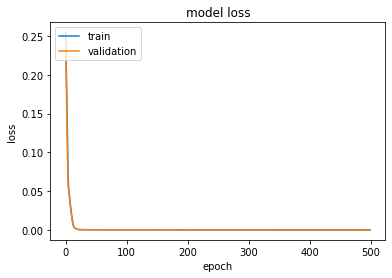

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
cnn_forecast = model_forecast(model, df_subset.UNITED_KINGDOM[:,  np.newaxis], window_size)
cnn_forecast = cnn_forecast[split_test - window_size:-1, -1, 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
cnn_forecast.shape

(200,)

In [ ]:
cnn_forecast = pd.DataFrame(cnn_forecast, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

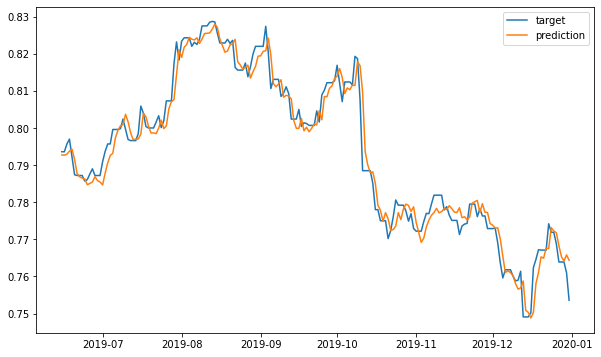

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test.UNITED_KINGDOM, label = 'target')
plt.plot (cnn_forecast.UNITED_KINGDOM, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.00288
MSE: 0.00002
RMSE: 0.00393


# New Section

In [ ]:
df_subset_diff = df_subset.UNITED_KINGDOM.diff()
data_train_diff = df_subset_diff[:split_train]
data_train_diff = data_train_diff.dropna()
data_val_diff = df_subset_diff[split_train:split_test]
data_test_diff = df_subset_diff[split_test:]

In [ ]:
data_test_diff.values + df_subset.UNITED_KINGDOM.values[-201:-1] == data_test.UNITED_KINGDOM.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(data_train_diff, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<IPython.core.display.Javascript object>

Epoch 1/100
8/8 [==============================] - 2s 59ms/step - loss: 9.0232e-06 - mae: 0.0025
Epoch 2/100
8/8 [==============================] - 1s 54ms/step - loss: 8.8376e-06 - mae: 0.0024
Epoch 3/100
8/8 [==============================] - 1s 58ms/step - loss: 8.7178e-06 - mae: 0.0024
Epoch 4/100
8/8 [==============================] - 1s 54ms/step - loss: 8.9148e-06 - mae: 0.0024
Epoch 5/100
8/8 [==============================] - 1s 57ms/step - loss: 9.0112e-06 - mae: 0.0025
Epoch 6/100
8/8 [==============================] - 1s 57ms/step - loss: 8.9142e-06 - mae: 0.0025
Epoch 7/100
8/8 [==============================] - 1s 59ms/step - loss: 8.5597e-06 - mae: 0.0024
Epoch 8/100
8/8 [==============================] - 1s 58ms/step - loss: 8.3207e-06 - mae: 0.0024
Epoch 9/100
8/8 [==============================] - 1s 56ms/step - loss: 8.5852e-06 - mae: 0.0024
Epoch 10/100
8/8 [==============================] - 1s 56ms/step - loss: 8.3721e-06 - mae: 0.0024
Epoch 11/100
8/8 [===========

(0.0001, 0.1, -1e-05, 5e-05)

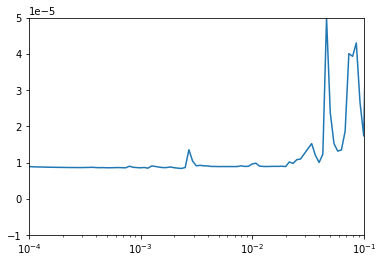

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, -0.00001, 0.00005])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(data_train_diff, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(data_val_diff, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=1e-2)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

<IPython.core.display.Javascript object>

Epoch 1/500
8/8 [==============================] - 3s 145ms/step - loss: 8.8234e-05 - mae: 0.0092 - val_loss: 1.6168e-05 - val_mae: 0.0048
Epoch 2/500
8/8 [==============================] - 1s 83ms/step - loss: 1.6479e-05 - mae: 0.0043 - val_loss: 6.7351e-06 - val_mae: 0.0026
Epoch 3/500
8/8 [==============================] - 1s 82ms/step - loss: 1.1013e-05 - mae: 0.0032 - val_loss: 6.1365e-06 - val_mae: 0.0023
Epoch 4/500
8/8 [==============================] - 1s 82ms/step - loss: 9.6967e-06 - mae: 0.0028 - val_loss: 6.3510e-06 - val_mae: 0.0024
Epoch 5/500
8/8 [==============================] - 1s 84ms/step - loss: 9.5910e-06 - mae: 0.0027 - val_loss: 6.2459e-06 - val_mae: 0.0024
Epoch 6/500
8/8 [==============================] - 1s 83ms/step - loss: 9.2910e-06 - mae: 0.0026 - val_loss: 6.0949e-06 - val_mae: 0.0023
Epoch 7/500
8/8 [==============================] - 1s 81ms/step - loss: 8.8457e-06 - mae: 0.0025 - val_loss: 5.9909e-06 - val_mae: 0.0022
Epoch 8/500
8/8 [================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


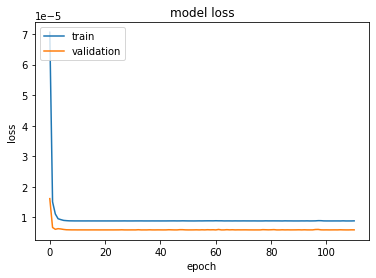

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
cnn_forecast_diff = model_forecast(model, df_subset_diff[:,  np.newaxis], window_size)
cnn_forecast_diff = cnn_forecast_diff[split_test - window_size:-1, -1, 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


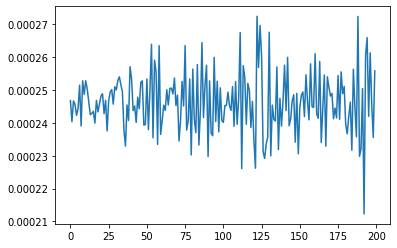

In [ ]:
plt.plot (cnn_forecast_diff)

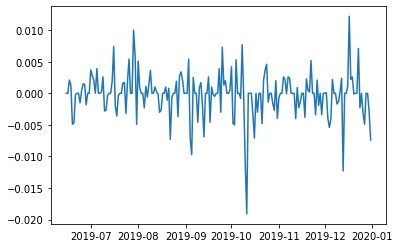

In [ ]:
plt.plot (data_test_diff)

In [ ]:
cnn_forecast_series = cnn_forecast_diff + df_subset.UNITED_KINGDOM.values[-201:-1]

In [ ]:
cnn_forecast_series.shape

(200,)

In [ ]:
cnn_forecast_series = pd.DataFrame(cnn_forecast_series, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

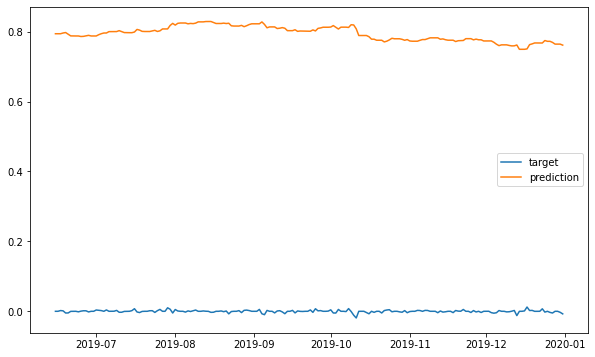

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test_diff, label = 'target')
plt.plot (cnn_forecast_series, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, cnn_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.00288
MSE: 0.00002
RMSE: 0.00393


# Note

In [ ]:
# prepare dataset: windows are consecutive in time order
def sequential_window_dataset(series, window_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))
    ds = ds.map(lambda window: (window[:-1], window[1:]))
    return ds.batch(1).prefetch(1)

In [ ]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(data_train.UNITED_KINGDOM, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, activation='relu', stateful=True, #only difference: using LSTM layer
                    batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, activation='relu', stateful=True),
  keras.layers.Dense(1),
  #keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=300,
                    callbacks=[lr_schedule, reset_states])

<IPython.core.display.Javascript object>

Epoch 1/300
33/33 [==============================] - 3s 15ms/step - loss: 0.3069 - mae: 0.7815
Epoch 2/300
33/33 [==============================] - 0s 15ms/step - loss: 0.3069 - mae: 0.7815
Epoch 3/300
33/33 [==============================] - 0s 15ms/step - loss: 0.3069 - mae: 0.7815
Epoch 4/300
33/33 [==============================] - 0s 15ms/step - loss: 0.3069 - mae: 0.7815
Epoch 5/300
33/33 [==============================] - 1s 16ms/step - loss: 0.3069 - mae: 0.7815
Epoch 6/300
33/33 [==============================] - 0s 15ms/step - loss: 0.3069 - mae: 0.7814
Epoch 7/300
33/33 [==============================] - 1s 15ms/step - loss: 0.3068 - mae: 0.7814
Epoch 8/300
33/33 [==============================] - 0s 15ms/step - loss: 0.3068 - mae: 0.7814
Epoch 9/300
33/33 [==============================] - 1s 15ms/step - loss: 0.3068 - mae: 0.7814
Epoch 10/300
33/33 [==============================] - 1s 15ms/step - loss: 0.3068 - mae: 0.7813
Epoch 11/300
33/33 [=============================

(1e-08, 10.0, -0.1, 1.0)

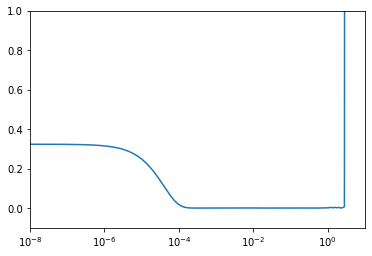

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 10, -0.1, 1])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(data_train.UNITED_KINGDOM, window_size)
valid_set = sequential_window_dataset(data_val.UNITED_KINGDOM, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  #keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_set, epochs=100,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

<IPython.core.display.Javascript object>

Epoch 1/100
33/33 [==============================] - 4s 43ms/step - loss: 0.2952 - mae: 0.7669 - val_loss: 0.2713 - val_mae: 0.7365
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: 0.2229 - mae: 0.6666 - val_loss: 0.1972 - val_mae: 0.6279
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 0.1603 - mae: 0.5650 - val_loss: 0.1425 - val_mae: 0.5338
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 0.1146 - mae: 0.4772 - val_loss: 0.1025 - val_mae: 0.4526
Epoch 5/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0813 - mae: 0.4015 - val_loss: 0.0732 - val_mae: 0.3824
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0573 - mae: 0.3361 - val_loss: 0.0519 - val_mae: 0.3220
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0401 - mae: 0.2798 - val_loss: 0.0365 - val_mae: 0.2702
Epoch 8/100
33/33 [==============================] - 1s 18ms/step - loss: 0.

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


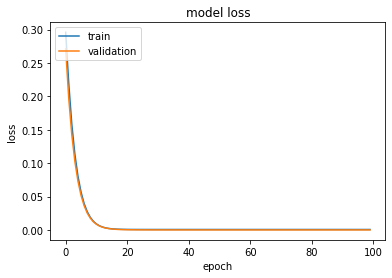

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = keras.models.load_model("my_checkpoint.h5")

In [ ]:
lstm_forecast = model.predict(df_subset.UNITED_KINGDOM[np.newaxis, :, np.newaxis])
lstm_forecast = lstm_forecast[0, split_test - 1:-1, 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
lstm_forecast.shape

(200,)

In [ ]:
lstm_forecast = pd.DataFrame(lstm_forecast, index = data_test.UNITED_KINGDOM.index, columns=['UNITED_KINGDOM'])

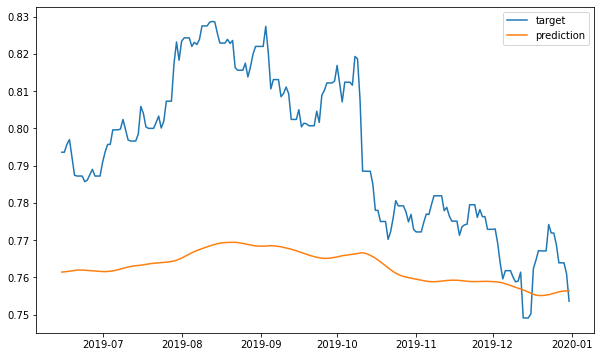

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_test.UNITED_KINGDOM, label = 'target')
plt.plot (lstm_forecast.UNITED_KINGDOM, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
print("MAE: {:.5f}".format(keras.metrics.mean_absolute_error(data_test.UNITED_KINGDOM, lstm_forecast.UNITED_KINGDOM).numpy()))
print("MSE: {:.5f}".format(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, lstm_forecast.UNITED_KINGDOM).numpy()))
print("RMSE: {:.5f}".format(np.sqrt(keras.metrics.mean_squared_error(data_test.UNITED_KINGDOM, lstm_forecast.UNITED_KINGDOM).numpy())))

MAE: 0.03089
MSE: 0.00124
RMSE: 0.03515
